## matplotlibを用いて住民税を計算する

## 住民税の計算方法
1. 合計所得金額－損失の繰越控除＝総所得金額
2. 総所得金額－所得控除額の合計＝課税所得額
3. 課税所得額×税率（10％）＝税額控除前の所得割額
4. 税額控除前の所得割額－税額控除の額＝税額控除後の所得割額
5. 税額控除後の所得割額＋均等割額＝住民税の額

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib


In [6]:
income_whole = 500

# 給与控除額
income_deduction = 100

income_taxable = income_whole - income_deduction

In [12]:
def 給与所得控除計算(income_whole: int):
    '''
        (参考)：https://www.nta.go.jp/taxes/shiraberu/taxanswer/shotoku/1410.htm
        *関数名を英語もしくはローマ字にすると可読性が悪くなると思いあえて感じにした
    '''
    
    if income_whole <= 162.5:
        income_deduction = 55
    elif income_whole <= 180:
        income_deduction = income_whole * 0.40 - 10
    elif income_whole <= 360:
        income_deduction = income_whole * 0.30 + 8
    elif income_whole <= 660:
        income_deduction = income_whole * 0.20 + 44
    elif income_whole <= 850:
        income_deduction = income_whole * 0.10 + 110
    else:
        income_deduction = 195
    
    return income_deduction

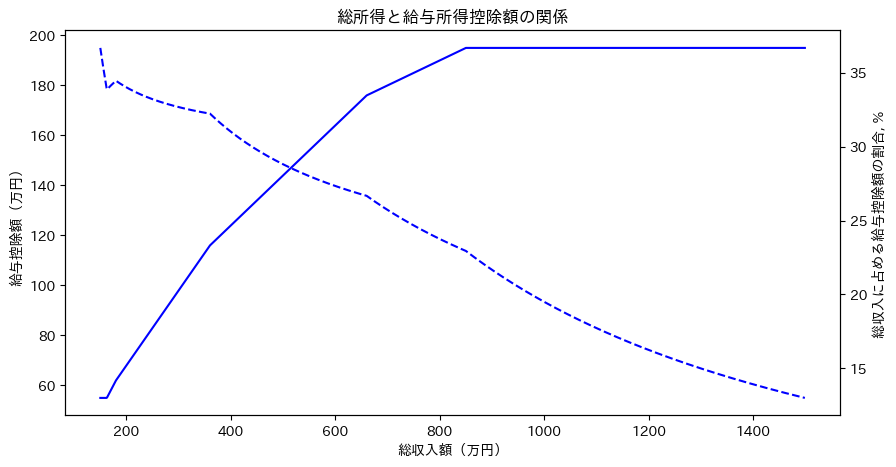

In [27]:
income_whole = np.arange(150, 1500)

income_deduction = np.array([給与所得控除計算(i) for i in income_whole])
income_deduction_rate = income_deduction / income_whole * 100

fig, ax = plt.subplots(figsize=(10, 5))
plt.title('総所得と給与所得控除額の関係')
ax.plot(income_whole, income_deduction, 'b-')
ax2 = ax.twinx()

ax2.plot(income_whole, income_deduction_rate, 'b--')

ax.set_xlabel('総収入額（万円）')
ax.set_ylabel('給与控除額（万円）')
ax2.set_ylabel('総収入に占める給与控除額の割合, %')
plt.show()